<a href="https://colab.research.google.com/github/francisji5/Covid19-classifier/blob/main/Covid_19_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip CovidDataset.zip

In [2]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


In [12]:
# CNN based model in Keras
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(294,294,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 292, 292, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 290, 290, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 145, 145, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 145, 145, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 143, 143, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 71, 71, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 71, 71, 64)       

In [14]:
# Training

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',\
    target_size = (294,294),
    batch_size = 32,
    class_mode = 'binary',
)

Found 294 images belonging to 2 classes.


In [16]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [17]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',\
    target_size = (294,294),
    batch_size = 32,
    class_mode = 'binary',
)

Found 98 images belonging to 2 classes.


In [18]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 93s 12s/step - loss: 0.9183 - accuracy: 0.5522 - val_loss: 0.6935 - val_accuracy: 0.5156
Epoch 2/10
8/8 [==============================] - 102s 13s/step - loss: 0.6474 - accuracy: 0.6016 - val_loss: 0.5846 - val_accuracy: 0.9688
Epoch 3/10
8/8 [==============================] - 91s 11s/step - loss: 0.4867 - accuracy: 0.7652 - val_loss: 0.4899 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 94s 12s/step - loss: 0.3315 - accuracy: 0.8478 - val_loss: 0.2198 - val_accuracy: 0.9531
Epoch 5/10
8/8 [==============================] - 91s 11s/step - loss: 0.2934 - accuracy: 0.8826 - val_loss: 0.1626 - val_accuracy: 0.9688
Epoch 6/10
8/8 [==============================] - 94s 12s/step - loss: 0.2024 - accuracy: 0.9174 - val_loss: 0.1191 - val_accuracy: 0.9688
Epoch 7/10
8/8 [==============================] - 92s 11s/step - loss: 0.2305 - accuracy:

In [19]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


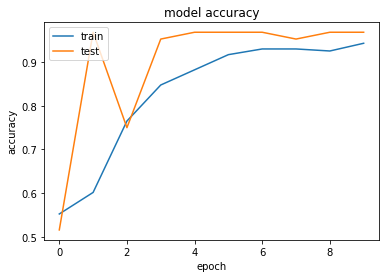

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

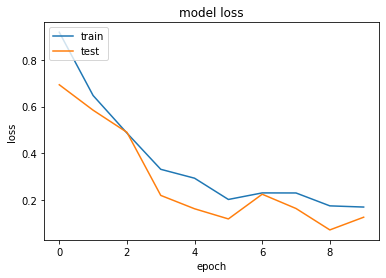

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
model.save("covid_model.h5")

In [23]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.14390510320663452, 0.9455782175064087]

In [24]:
model.evaluate_generator(validation_generator)

[0.12699131667613983, 0.9693877696990967]